# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | bonnyville
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | kotido
Processing Record 5 of Set 1 | hanyang
Processing Record 6 of Set 1 | bonavista
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | rawson
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | tezu
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | takab
Processing Record 16 of Set 1 | sibolga
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | luanda
Processing Record 23 of Set 1 | san cristobal
Processing Record 24 of Set 1 | oranjemund
Processing Record 25 

Processing Record 36 of Set 4 | kodiak
Processing Record 37 of Set 4 | bay roberts
Processing Record 38 of Set 4 | nikolskoye
Processing Record 39 of Set 4 | jacareacanga
Processing Record 40 of Set 4 | jawhar
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | longfeng
Processing Record 43 of Set 4 | sobolevo
Processing Record 44 of Set 4 | tvoroyri
Processing Record 45 of Set 4 | hambantota
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | ushtobe
Processing Record 48 of Set 4 | grand baie
Processing Record 49 of Set 4 | rio brilhante
Processing Record 1 of Set 5 | ola
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | nicoya
Processing Record 4 of Set 5 | clinton
Processing Record 5 of Set 5 | tual
City not found. Skipping...
Processing Record 6 of Set 5 | mpanda
City not found. Skipping...
Processing Record 7 of Set 5 | leningradskiy
City not found. Skipping...
Processing Record 8 of Set 5 | tazovskiy
Processing Reco

Processing Record 22 of Set 8 | sangar
Processing Record 23 of Set 8 | nenita
Processing Record 24 of Set 8 | lingolsheim
Processing Record 25 of Set 8 | kuminskiy
Processing Record 26 of Set 8 | zamora
Processing Record 27 of Set 8 | marshall
Processing Record 28 of Set 8 | guia de isora
City not found. Skipping...
Processing Record 29 of Set 8 | luchegorsk
Processing Record 30 of Set 8 | amapa
Processing Record 31 of Set 8 | nangomba
Processing Record 32 of Set 8 | yamada
Processing Record 33 of Set 8 | iracoubo
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | luena
Processing Record 37 of Set 8 | orotukan
City not found. Skipping...
Processing Record 38 of Set 8 | lebrija
Processing Record 39 of Set 8 | ruston
Processing Record 40 of Set 8 | sibu
City not found. Skipping...
Processing Record 41 of Set 8 | vila velha
City not found. Skipping...
Processing Record 42 of Set 8 | surt
Processing Record 43 of Set 8 | ve

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [20]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [21]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,padang,100,ID,1573941615,89,-0.92,100.36,64.69,4.00
1,bonnyville,90,CA,1573941615,92,54.27,-110.74,33.80,8.05
2,karratha,0,AU,1573941615,57,-20.74,116.85,82.22,10.51
3,kotido,81,UG,1573941615,44,3.01,34.12,76.33,8.39
4,hanyang,50,CN,1573941615,80,32.14,105.51,57.00,3.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

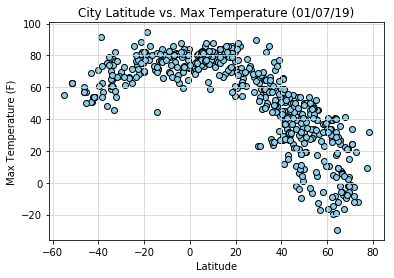

In [23]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

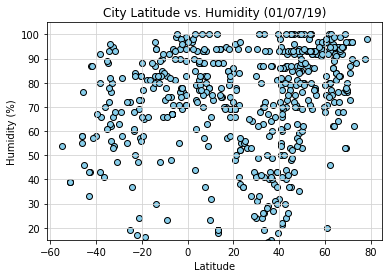

In [24]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

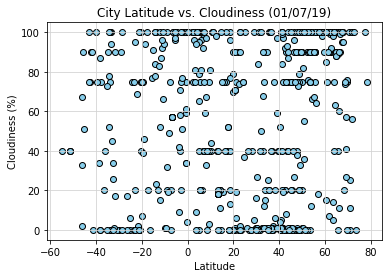

In [25]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

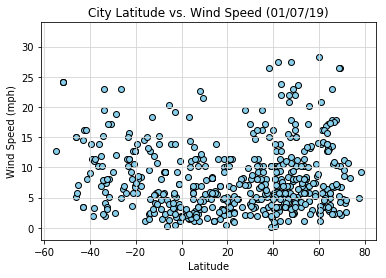

In [26]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_vs_WindSpeed.png")
plt.show()

## Analysis

* There is a clear correlation between temprature and latitude. with higher max tempratures seen in cities in the southern hemisphere vs lower tempratures for cities in the northern hemisphere.
* There does not seem to be a strong relationship between latitude and wind speed. However, it appears that the large majority of cities have windspeeds between 0mph and 15mph regardless of their latitude.
* There does not seem to be any correlation between latitude and percent cloudiness. Most cities are either very low in cloudiness (0%) or very high (80-100%) regardless of latitude.